### Feature extraction with PCA
https://monkeylearn.com/blog/data-preprocessing/

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np
import pandas as pd
#Visualization
import plotly.express as px
import plotly.offline as pyo
import plotly.figure_factory as ff
import plotly.subplots as sp
import plotly.graph_objs as go
# !pip install -U scikit-learn
pd.set_option('display.max_columns', None)

In [65]:
df=pd.read_csv('df_withoutOutliers.csv')

In [66]:
df.shape

(19976, 27)

#### PCA approach

In [67]:
# Import necessary libraries
from sklearn import datasets  # to retrieve the iris Dataset
import pandas as pd  # to load the dataframe
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA
import seaborn as sns  # to plot the heat maps

In [68]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_df = df.select_dtypes(include=numerics)
numeric_df=numeric_df.drop(['Stream'], axis=1)

#### Standardize the features

In [69]:
#Standardize the features
#Create an object of StandardScaler which is present in sklearn.preprocessing
scalar = StandardScaler()
scaled_data = pd.DataFrame(scalar.fit_transform(numeric_df),columns=numeric_df.columns) #scaling the data
scaled_data.head()

,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Liveness,Valence,Tempo,Duration_ms,Views,Likes,Comments,Licensed,official_video
0,1.194504,0.324909,0.198943,0.205498,0.769197,-0.989164,-0.274373,2.504223,0.989831,0.604687,0.021370,2.483203,3.435377,0.780901,0.65077,0.530022
1,0.335158,0.315543,0.758053,0.392741,-0.611360,-0.714428,-0.282921,-0.873661,1.316248,-0.942235,-0.309093,-0.081887,0.265262,0.024590,0.65077,0.530022
2,0.450141,1.345905,-1.198834,0.801252,-0.404464,-0.869741,-0.042480,-0.458205,0.088103,-0.427033,-0.088799,-0.344265,-0.226114,-0.103930,0.65077,0.530022
3,0.413830,0.484147,-0.919279,0.393825,-0.650858,-1.018355,2.361776,-0.768158,0.198269,-0.007894,0.186506,0.494829,0.702667,0.156497,0.65077,0.530022
4,0.256485,0.273391,1.317164,-0.216666,0.712771,-0.929908,-0.286496,-0.733586,-0.017983,1.597531,1.761130,2.173374,3.420840,0.704799,0.65077,0.530022


#### Check the Co-relation between features without PCA 

The colour scale on the side of the heatmap helps determine the magnitude of the co-relation. In our example, we can clearly see that a darker shade represents less co-relation while a lighter shade represents more co-relation. The diagonal of the heatmap represents the co-relation of a feature with itself – which is always 1.0, thus, the diagonal of the heatmap is of the highest shade.

<AxesSubplot: >

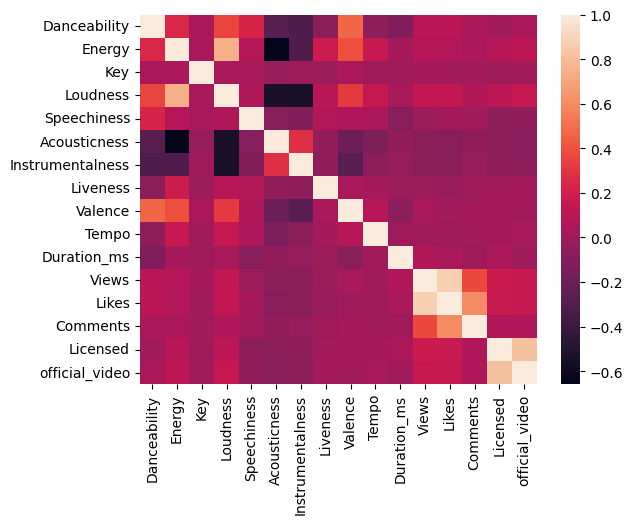

In [70]:
sns.heatmap(scaled_data.corr())

We can observe from the above heatmap that there are features with high co-relation. Thus, we evidently need to apply dimensionality reduction. 

#### Applying Principal Component Analysis

We will apply PCA on the scaled dataset. We need to create an object of PCA  and while doing so we also need to initialize n_components – which is the number of principal components we want in our final dataset. Here, we have taken n_components = 3, which means our final feature set will have 3 columns. We fit our scaled data to the PCA object which gives us our reduced dataset.

In [71]:
x=scaled_data
y=df['Stream']
n_components=10
columns=['PC'+str(i+1) for i in range(10)]

In [72]:
#Applying PCA
#Taking no. of Principal Components as 3
pca = PCA(n_components = n_components)
pca.fit(x)
x_new = pca.transform(x)
data_pca = pd.DataFrame(x_new,columns=columns)
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,3.229055,2.727459,1.287182,0.110770,1.959584,-0.108279,0.953655,0.126677,-1.174544,0.903502
1,1.204018,0.032674,-0.503212,-1.022533,-1.218832,0.347465,0.425305,0.829492,0.319479,0.192300
2,1.348540,-0.485154,-0.968189,0.103943,-0.507706,-1.122139,-0.506676,0.303269,1.051764,0.317215
3,0.521061,1.058291,-0.505638,0.179246,-0.580767,-0.273192,-0.855157,0.617673,1.475616,2.021277
4,2.287371,3.186357,0.982340,0.828323,-0.521418,1.889658,-0.354589,-1.666581,-0.648067,0.617945


<AxesSubplot: >

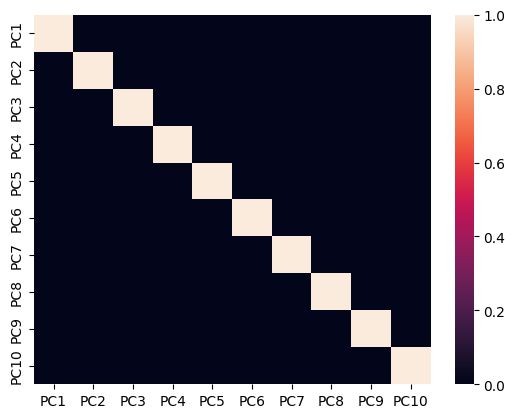

In [73]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

The above heatmap clearly depicts that there is no correlation between various obtained principal components (PC1, PC2, and PC3). Thus, we have moved from higher dimensional feature space to a lower-dimensional feature space while ensuring that there is no correlation between the so obtained PCs is minimum. Hence, we have accomplished the objectives of PCA.

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e

https://stackoverflow.com/questions/50796024/feature-variable-importance-after-a-pca-analysis/50845697#50845697

In [78]:
def myplot(score,coeff,labels=None):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c = y)
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1],color = 'g',alpha = 0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'r', ha = 'center', va = 'center')
        else:
            plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color = 'r', ha = 'center', va = 'center')


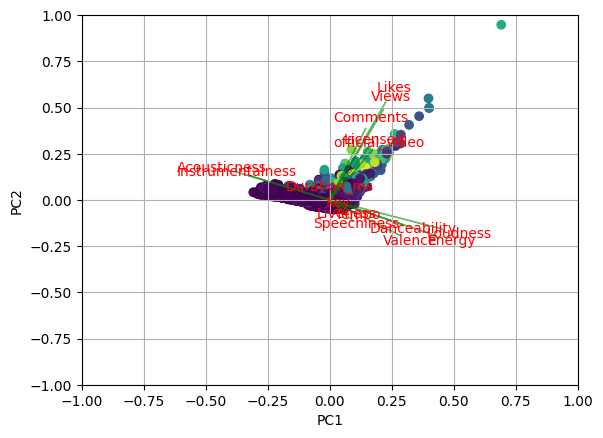

In [79]:
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.grid()

#Call the function. Use only the 2 PCs.
myplot(x_new[:,0:2],np.transpose(pca.components_[0:2, :]),list(numeric_df.columns))
plt.show()

In [60]:
pca.explained_variance_ratio_

array([0.20504234, 0.14197547, 0.10489058, 0.07881233, 0.06678912,
       0.06270059, 0.06164293, 0.05750035, 0.05241611, 0.04705601])

In [81]:
np.array(pca.explained_variance_ratio_).sum()

0.8788258388065506

In [82]:
def mostImportantFeature(features):
    return np.argpartition(features, -3)[-3:]

In [84]:
for i,pc in enumerate(abs( pca.components_ )):
    indexs=mostImportantFeature(np.array(pc))
    columns=set([list(numeric_df.columns)[ind] for ind in indexs])
    x = ",".join(columns)
    print("Most important features on PC"+str(i+1)+":",x)

Most important features on PC1: Acousticness,Loudness,Energy
Most important features on PC2: Likes,Views,Comments
Most important features on PC3: Likes,official_video,Licensed
Most important features on PC4: Danceability,Valence,Duration_ms
Most important features on PC5: Speechiness,Liveness,Duration_ms
Most important features on PC6: Liveness,Key,Tempo
Most important features on PC7: Liveness,Key,Tempo
Most important features on PC8: Speechiness,Valence,Duration_ms
Most important features on PC9: Instrumentalness,Acousticness,Valence
Most important features on PC10: Instrumentalness,Valence,Duration_ms


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=c6bca811-fc7a-456b-b8f3-4c66c733d95a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>